In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('F:/Study/methodpro/ml/labs/habr/howpop_train.csv')

In [7]:
data.head().T

,0,1,2,3,4
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/,https://habrahabr.ru/post/18291/,https://geektimes.ru/post/18294/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru
post_id,18284,18285,18286,18291,18294
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00,2008-01-02 14:34:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo
flow,develop,design,design,design,NaN
polling,False,False,False,False,False
content_len,4305,7344,8431,5662,3706
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone
comments,0,1,47,102,230


In [10]:
data.drop(filter(lambda c: c.endswith('_lognorm'), data.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True)

In [13]:
data.describe(include = ['object', 'bool']).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/company/mediagrus/blog/25...,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [14]:
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

In [16]:
print(data.published.dtype)
data['published'] = pd.to_datetime(data.published, yearfirst = True)
print(data.published.dtype)

object
datetime64[ns]


In [17]:
data['year'] = [d.year for d in data.published]
data['month'] = [d.month for d in data.published]

data['dayofweek'] = [d.isoweekday() for d in data.published]
data['hour'] = [d.hour for d in data.published]

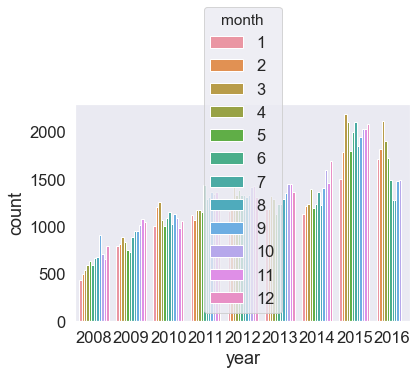

In [18]:
sns.countplot(x='year', hue='month', data=data)

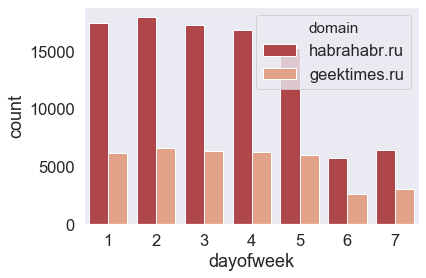

In [19]:
sns.countplot(x='dayofweek', hue='domain', data=data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C35F7D6CC0>,
      dtype=object)

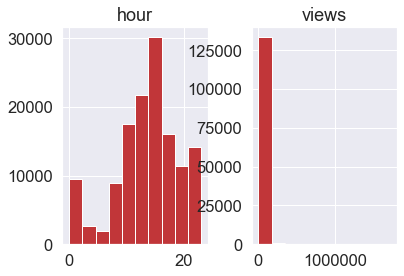

In [20]:
data[['hour', 'views']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C35FC5D748>,
      dtype=object)

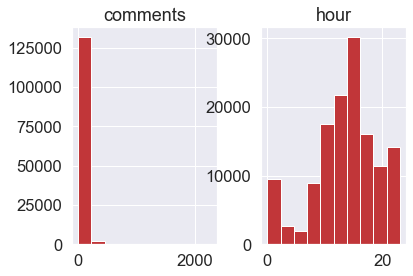

In [22]:
data[['hour', 'comments']].hist()

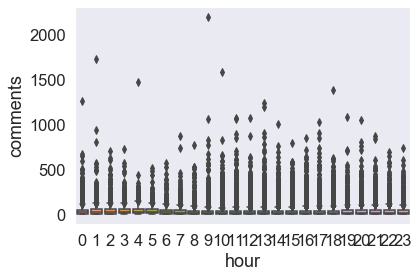

In [23]:
sns.boxplot(x='hour', y='comments', data=data[data['domain'] == 'habrahabr.ru'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C35FE2C908>,
      dtype=object)

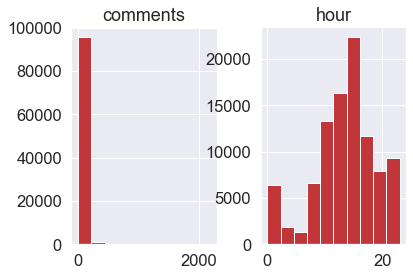

In [24]:
data[data['domain'] == 'habrahabr.ru'][['hour', 'comments']].hist()

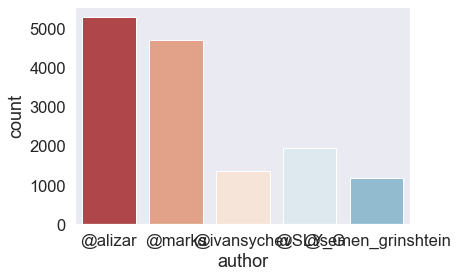

In [25]:
sns.countplot( data[data['author'].isin(data['author'].value_counts().head(5).index)]['author'])

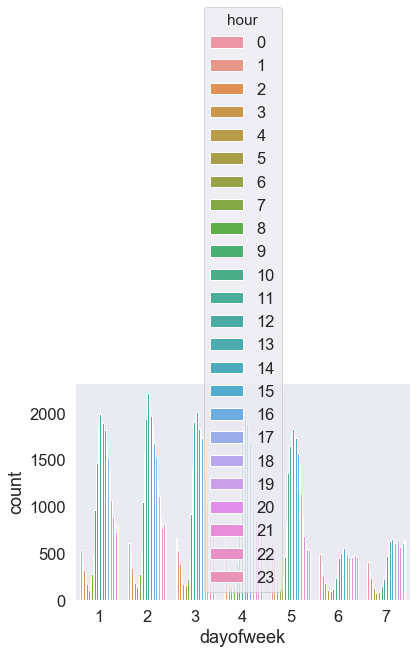

In [26]:
sns.countplot(x='dayofweek', hue='hour', data=data)